# Empalme con la clase anterior
## Ecuacion de adveccion (advection equations)
La ecuacion de onda $u_{xx} - u_{tt}/c^2=0$ (sin fuente) se puede factorizar en dos ecuacion. Es decir

$$\frac{\partial^2 u }{\partial x^2} - \frac{1}{c^2(x)} \frac{\partial^2 u}{\partial t^2} = 0 \Leftrightarrow
\left ( \frac{\partial}{\partial x} - \frac{1}{c(x)} \frac{\partial}{\partial t}  \right ) \left (
\frac{\partial}{\partial x} + \frac{1}{c(x)} \frac{\partial}{\partial t}    \right ) u = 0 $$


De forma que este sistema es equivalente a las siguientes dos ecuaciones

$$
\frac{\partial u}{\partial x} + \frac{1}{c(x)} \frac{\partial u}{\partial t} = 0  \quad , \quad
\frac{\partial u}{\partial x} - \frac{1}{c(x)} \frac{\partial u}{\partial t} = 0  
$$

Asumimos $c>0$ es constante, $x \in [a,b], a,b \in \mathbb{R}$, $a \ne b$.Cualquier funcion del tipo

$$u(x,t)=f(x-ct) $$
satisface la primera de las Ecuaciones (3). Es decir

$$u_x = f'(x-ct)  \quad , \quad u_t = -f'(x-ct)c $$
de forma que $u_x + u_t/c=0$. Esta ecuacion representa un pulso viajando a la derecha. Definamos una condicion inicial $t=t_0$.

$$u(x,t_0) = p(x) $$
esta condicion inicial determina la forma del pulso.
Debemos definir condiciones de bordo consistentes con esto
$x=a, x=b$.

* Para $u=f(x-ct)$
$$u(a,t) = f(a - ct) = f(a + ct_0 - c t_0 - ct) = f(a + c(t_0-t) - c t_0) = p[a + c(t_0 -t)] $$
Verifiquemos esto


$$p[a + c(t_0 -t)] = u( a + c(t_0 -t), t_0)= f( a+ c(t_0 -t) - ct_0) = f(a-ct) $$


De igual forma para $x=b$

$$u(b,t) = f(b-ct) = f(b+ct_0 - c t_0 -ct) = f( b + (c (t_0-t) - t_0) =
p[b + c(t_0 - t)] $$

De esta forma podems escribir el problema

$$u_x + \frac1c u_t = 0 $$
$$u(x,t_0 = p(x)  \quad , \quad u(a,t) = p[a + c(t_0 -t)
\quad , \quad u(b,t) = p[b + c(t_0 -t) $$


* Para $u=f(x+ct)$

Aca $u_x = f'(x + ct)$, $u_t = f'(x+ct)c$

La condicion inicial es

$$u(x,t_0 )= f(x + ct_0) = p(x) $$
Esta condicion inicial determina el pulso de la onda viajando a la izquierda.

Asi como hicimos en el analisis de arriba
para $x=a$ y luego para $x=b$

$$x=a $$
$$u(a,t) = f(a + ct) = f(a -c t_0 + c t_0 + ct) = f[ a - c(t_0 -t) + c t_0 = p[a - c(t_0 -t)]$$

De igual forma en $x=b$

$$u(b,t) = f(b + ct) = f(b - c t_0 + c t_0 + ct) = f[b -c(t_0 -t) c t_0] = p[b - c(t_0 -t)] $$
Escribimos

$$u_x - \frac{1}{c} u_t = 0 $$
$$u(x,t_0) = p(x)  \quad , \quad u(a,t) = p[a - c(t_0-t)] \quad  , \quad u(b,t) = p[b + c(t -t_0)] $$


Probamos para estabilidad
* Metodo FTCS (hacia adelante en tiempo y central en espacio). No es estable.
* Progresivo tanto en tiempo como en espacio y tampoco funciono.
* Crank-Nicholson. Es estable.

Tratamos
### Crank-Nicholson

La parte espacial es un promedio de dos temporales
El esquema es

$$w_{i j+1} = -\frac{\gamma}{4} ( w_{i+1 j+1} - w_{i-1 j+1}) - \frac{\gamma}{4} (w_{i+1 j} - w_{i-1 j}) + w_{ij} \tag{1} $$
El sistema matricial queda

$$A w_{j+1} = B w_j + b $$

Donde


$$A =  
\begin{pmatrix}
1 & \frac{\gamma}{4} & 0 & 0 & \cdots & 0 \\
-\frac{\gamma}{4} & 1 & \frac{\gamma}{4} & 0 & \cdots & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots  & \vdots  \\
\vdots & \ddots & \ddots & -\frac{\gamma}{4} & 1 & \frac{\gamma}{4} \\
0 & \cdots & \cdots & \cdots & -\frac{\gamma}{4} & 1
\end{pmatrix}
$$

$$w_{j+1} =
\begin{pmatrix}
w_{1 j+1 } \\
w_{2 j+1 } \\
\vdots \\
\vdots \\
w_{n-2 j+1}
\end{pmatrix}
 $$

$$B =  
\begin{pmatrix}
1 & -\frac{\gamma}{4} & 0 & 0 & \cdots & 0 \\
\frac{\gamma}{4} & 1 & -\frac{\gamma}{4} & 0 & \cdots & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots  & \vdots  \\
\vdots & \ddots & \ddots & \frac{\gamma}{4} & 1 & -\frac{\gamma}{4} \\
0 & \cdots & \cdots & \cdots & \frac{\gamma}{4} & 1
\end{pmatrix}
$$

$$w_{j} =
\begin{pmatrix}
w_{1 j } \\
w_{2 j } \\
\vdots \\
\vdots \\
w_{n-2 j}
\end{pmatrix}
$$

Por ultimo

$$b = \frac{\gamma}{4}
\begin{pmatrix}
 w_{0 j+1} +   w_{0j} \\
 0 \\
 \vdots \\
 0 \\
 -w_{n-1 j+1} - w_{n-1 j}
\end{pmatrix}
 $$



# Implementacion en `Pyhthon`


In [2]:
# cargamos librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure

# figure(figsize=(16,10))



In [20]:
# elaboracion del algoritmo
def solve_advec(c, t0, a, b, nt, nx, dt, p, cb):
    L = float(b-a)
    dx = L/(nx-1) # por que menos una?

    gamma = c*dt/dx

    tmax = nt*dt + t0
    w = np.zeros((nx,nt))
    X = np.linspace(a,b,nx)

    print("dimensiones del modelo", w.shape)

    # condiciones de frontera Direchlet homogeneas
    for j in range(nt):
        w[0,j]= p(a - c*(j*dt - t0))
        w[nx-1, j] = p(b - c*(j*dt - t0))

    # inicializamos vector de la derecha
    rhs = np.zeros(nx-2)

    # inicializamos las matrices A, B
    A = np.zeros((nx-2,nx-2))
    B = np.zeros((nx-2,nx-2))
    b = np.zeros(nx-2)

    # condicion inicial
    w[:, 0] = np.asarray([p(x) for x in X])

    # lleno de matrices A, B
    for i in range(nx-2):
        A[i,i] = 1
        B[i,i] = 1
        if i > 0:
            A[i,i-1] = -gamma/4
            B[i,i-1] = gamma/4
        if i < nx-3:
            A[i,i+1] = gamma/4
            B[i,i+1] = -gamma/4

    b[0] =0.25*gamma*(w[1,0] + w[0,0])
    b[nx-3] = -0.25*gamma*(w[nx-1,1] + w[nx-1,0]) # pruebe  con nx-1

    # iteracion sobre tiempos
    rhs = B.dot(w[1:-1,0]) + b
    for j in range(0, nt-1):

        # resolvemos el sistema A w_j+1 = w_j
        x = np.linalg.solve(A, rhs)
        rhs = B.dot(x) + b

        # rotacion
        for i in range(nx-2):
            w[i+1,j+1] = x[i]

        # calculamos los bordes de nuevo
        b[0] = 0.25*gamma*(w[0,j+1] + w[0,j])
        b[nx-3] = -0.25*gamma*(w[nx-1,j+1] + w[nx-1,j])

    return w





In [21]:
# prueba numerica
# velocidad
v=1.0

# condiciones de borde e iniciales en 0
def e(x):
    return 0

def p(x):
    return np.exp(-400*(x-0.5)**2)

def q(x):
    return 0

dt=0.001
nx=501
nt=1000
a=0
b=1
t0=0
cb=0

w = solve_advec(v, t0, a, b, nt, nx, dt, p, cb)

dimensiones del modelo (501, 1000)


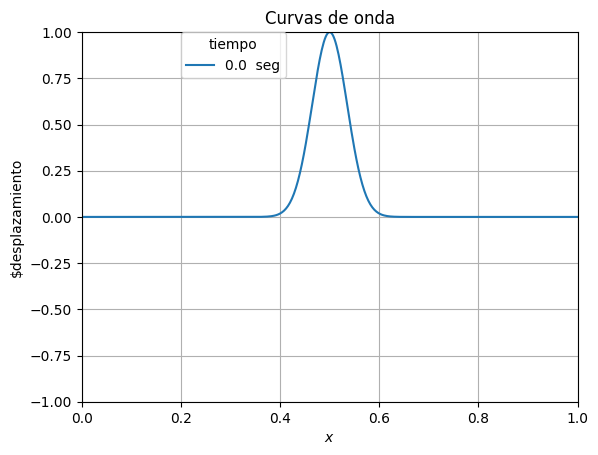

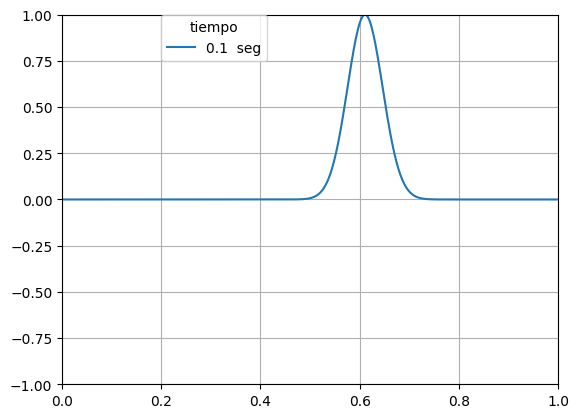

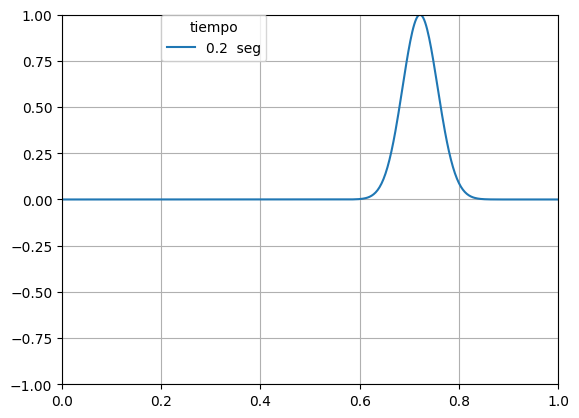

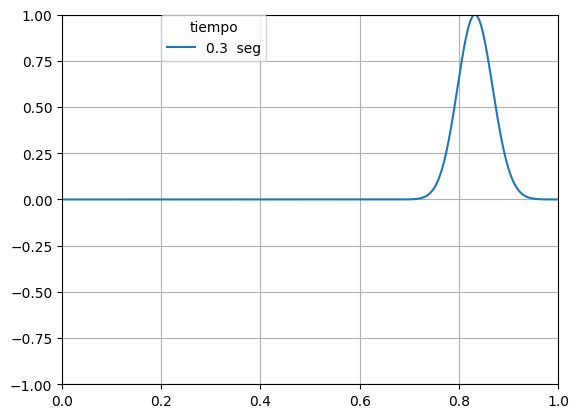

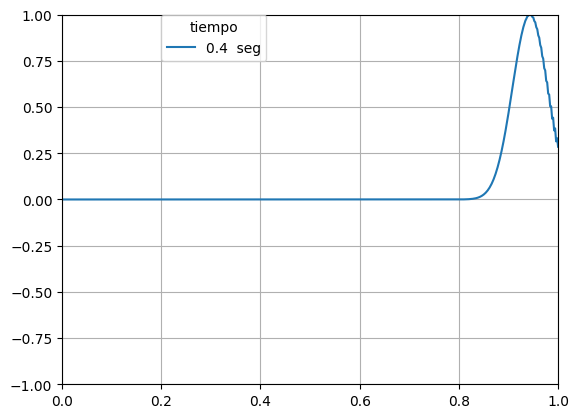

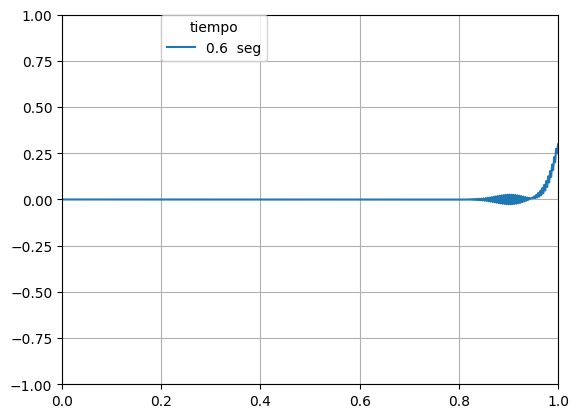

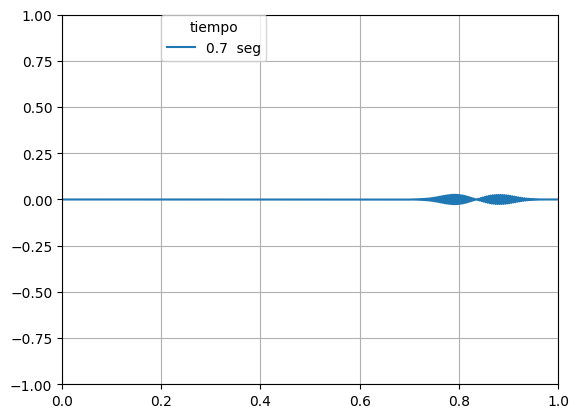

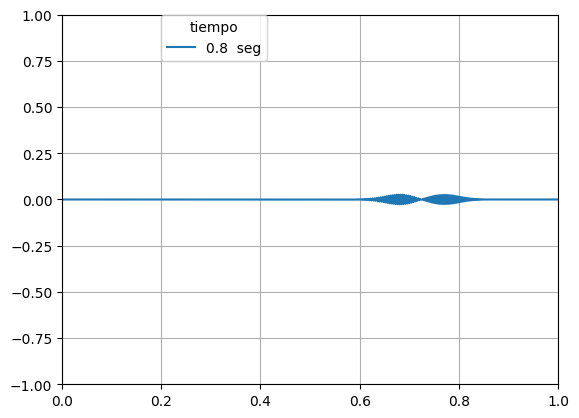

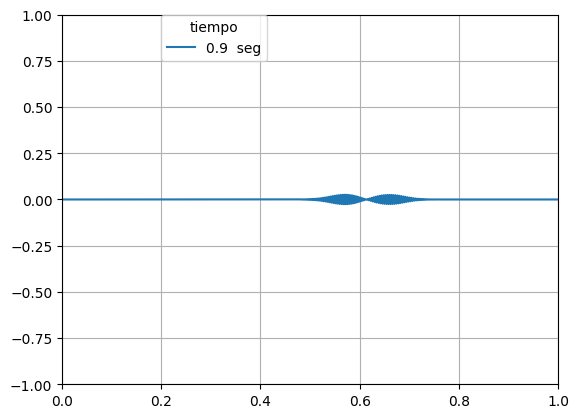

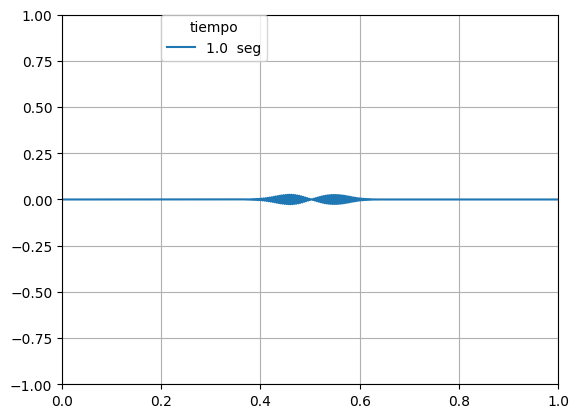

In [22]:
# graficamos el modelo
params={'figure.figsize':(16,10)}
params={'legend.fontsize': 'x-large'}
params={'axes.labelsize': 'x-large'}
params={'axes.titlesize':'x-large'}
params={'legend.handlength': 1}

Ndt=111
plt.xlabel(r'$x$')
plt.ylabel(r'$desplazamiento')
plt.title(r'Curvas de onda')

# dominio
X = np.linspace(a,b, w.shape[0])

for j in range(0, nt, Ndt):
    t = j*dt + t0

    plt.plot(X, w[:,j], label=str(round(t,1)) + '  seg')
    plt.axis([0,1.0, -1,1])

    plt.grid(True)
    plt.legend(bbox_to_anchor=(0.2, 1), loc=2, borderaxespad=0.0, title="tiempo")
    plt.show()

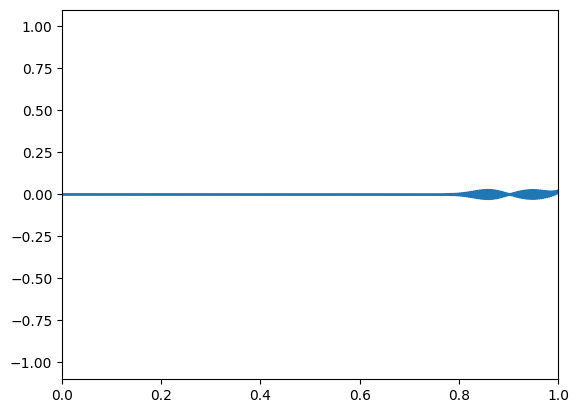

In [19]:
from matplotlib.animation import FuncAnimation

X = np.linspace(a,b,w.shape[0])
fig , ax = plt.subplots()

line, = ax.plot([], [], lw=2)

# set limits
ax.set_xlim(0,1)
ax.set_ylim(-1.1,1.1)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# update function
def update(num):
    line.set_data(X, w[:,num])
    return line,

# create the animation
j_max = 600
anim = FuncAnimation(fig, update, frames=j_max, init_func=init, blit=True, interval=20)

# save animation
anim.save('advec.gif', writer='Pillow')

# Fenomeno de dispersion  numerica.
Piense en un peloton de ciclistas. Cuando estan en plan todos corren a la misma velocidad y no se **dispersan**. Cuando empieza la montanha los mas pesados se quedan y los mas livianos suben mas rapido. Aca se dispersan.
Las senhales (funciones) son paquetes de ondas sinuosoidales (series de Fourier, curso PDF) estas sinuosoidales son como los 'ciclistas' del ejemplo de arriba. Unas van rapido y otras despacio. Esto hace que la senhal se disperse.

Definimos dos conceptos.
Piense en una onda del paquete que forma la senhal. $u(x,t) = A \sin( kx - \omega t)$.
Si estamos en la cresta de la onda (digamos que en la fase $\phi=0$ $\phi=kx-\omega t$ es constante.

$$d\phi/dt=0 $$ y si $x=x(t)$

$$ k \frac{dx}{dt} - \omega = 0 $$

$$velocidad = \frac{dx}{dt} = \frac{k}{\omega}$$



* **velociad de fase**
$$v_f = \frac{\omega}{k}  $$

Podria ser que $\omega = \omega(k)$ como lo vamos a ver mas adelante. Entonces existe otra velociad llamada de grupo

**velocidad de grupo**
$$ v_g = \frac{\partial w}{\partial k}  $$

Si la velocidad de fase es distinta a la de grupo existe **dispersion**.

Veamos varios ejemplos.

La ecuacion de onda en una dimension con velocidad constante $c$ (ignoramos la fuente)
$$ \frac{\partial^2 u}{\partial x^2} - \frac{1}{c^2} \frac{\partial^2 u}{\partial t^2} = 0 \tag{2} $$

Vamos a tomar la transformada de Fourier en tiempo y frecuencia. La transformada de Fourier la estudiamos en el curso de PDF (Partial Differential Equations). Doy un adelanto.

* Hay dos dominios (temporales)
    * tiempo ($t$)
    * frecuencia ($\omega= \frac{2 \pi}{T}$)
    donde $T$ es el periodo.
* Hay dos dominios (espaciales)
    * espacio ($x$)
    * el numero de onda $k=\frac{2\pi}{\lambda}$
    donde $\lambda$ es la longitud de onda.

La **transformada de Fourier** mapea los datos de un espacio al dual. Es decir de tiempo a frecuencia, o de espacio a numero de onda. En ese mapeo asi funcionan las derivadaso

$$\frac{\partial}{\partial t} \overset{FT}{\implies} -\mathrm{i} \omega   $$

$$\frac{\partial}{\partial x} \overset{FT}{\implies} \mathrm{i} k   $$

Vamos a tomar la doble (en tiempo y en espacio) de Fourier de la ecuacion de onda.

Resulta

$$\left ( -k^2 + \frac{\omega^2}{c^2}   \right )  U(k, \omega) = 0 $$

Si asumimos que $U(k, \omega) \ne 0$
$$ -k^2 + \frac{\omega^2}{c^2}    = 0 \tag{3} $$
A esto se le llama **relacion de dispersion**.

Otra forma de obtener esta ecuacion es pensar en una onda de la forma

$$u(x,t, k, \omega) = A \mathrm{e}^{\mathrm{i}(kx - \omega t)} $$
insertarla en la Ecuacion de Onda (2) y obtener
(tarea)

De la Ecuacion (3), despejamos $\omega$
y obtenemos

$$ \omega = \pm c k $$

Pregunta: Es esta ecuacion de onda dispersiva si o no?
Respuesta

** Velocidad de fase
    $$\frac{\omega}{k} = \pm c$$
** Velocidad de grupo
    $$\frac{\partial \omega}{\partial k} = \pm c $$

No es dispersiva. Velocidad de fase = velocidad de grupo. Ni la velocidad de fase ni la velocidad de grupo dependen de la frecuencia.

La dispersion que hemos visto hasta el momento es **dispersion fisica**.

Veamos ahora que es **dispersion numerica**:
Para esto visitamos el esquema de diferencias finitas centrales en tiempo y en espacio de la ecuacion de adveccion (4).

$$w_{i \; j+1} = \gamma_i^2 w_{i-1 j} + 2(1 - \gamma_i^2) w_{ij} + \gamma_i^2 w_{i+1 j} - w_{i j-1}  \tag{4} $$

Para pasar esto al dominio de la frecuencia/numero de onda usamos lo  siguiente.

$$u(x, t+ \Delta t) \overset{FT}{\implies} \mathrm{e}^{-\mathrm{i} \omega \Delta t} U(x,\omega)$$


$$u(x + \Delta x,  t) \overset{FT}{\implies} \mathrm{e}^{\mathrm{i} k \Delta x} U(x,\omega)$$

$$u(x + \Delta x,  t+ \Delta t) \overset{FT}{\implies} \mathrm{e}^{\mathrm{i}(-\omega \Delta t +  k \Delta x)} U(k,\omega)$$

Vamos a aplicar la transformada de Fourier a la Ecuacion (4)

$$ W_{ij} \left (  \mathrm{e}^{\mathrm{i} \omega \Delta t} + \mathrm{e}^{-\mathrm{i} \omega \Delta t}\right ) =
\left (
 \gamma^2 \mathrm{e}^{-\mathrm{i} k \Delta x}
  + 2(1 - \gamma^2) + \gamma^2 \mathrm{e}^{\mathrm{i} k \Delta x} \right ) W_{ij} $$

  Si W_{ij} \ne


  $$   \mathrm{e}^{\mathrm{i} \omega \Delta t} + \mathrm{e}^{-\mathrm{i} \omega \Delta t}=
 \gamma^2 \mathrm{e}^{-\mathrm{i} k \Delta x}
  + 2(1 - \gamma^2) + \gamma^2 \mathrm{e}^{\mathrm{i} k \Delta x} $$

Usando las igualdades de Euler tenemos

$$2 \cos \omega \Delta t - 2 \gamma^2 \cos k \Delta x + 2(1 - \gamma^2) = 0  $$

$$ \cos \omega \Delta t -  \gamma^2 \cos k \Delta x + (1 - \gamma^2) = 0  $$

Depejamos $\omega \Delta t$ sacando coseno inversa arccos

$$\omega \Delta t = \arccos \left (  \gamma^2 \cos k \Delta x + (1 - \gamma^2) \right ) $$

$$\omega  = \frac{1}{\Delta t} \arccos \left (  \gamma^2 \cos k \Delta x + (1 - \gamma^2) \right ) \tag{5} $$

* **Velocidad de fase**:

$$v_{fase} = \frac{\omega}{k} = \frac{1}{k \Delta t} \arccos \left ( \gamma^2 \cos k \Delta x + (1 - \gamma^2)   \right ) $$

* **Velocidad de grupo**

$$v_{grupo}= \frac{\partial \omega}{\partial k} = -\frac{\Delta x}{\Delta t} \frac{-\gamma^2 \sin k \Delta x}{\sqrt{1 - [ \gamma^2 \cos k \Delta x + (1 - \gamma^2) }}$$

Claramente $v_{fase} \ne v_{grupo}$ y la ambias cambian con $k$. O sea que el sistema es dispersivo.

Pregunta: Cuando la ecuacion de adveccion arriba no es dispersiva?
Respuestra: cuando $\gamma = 1$.
Veamos. De la Ecuacion (5)

$$\omega = \frac{k \Delta x}{\Delta t} $$
De aca:

* **Velocidad de fase**
$$v_{fase}= \frac{\omega}{k} = \frac{\Delta x}{\Delta t}$$

* **Velocidad de grupo**
$$v_{grupo} = \frac{\partial \omega}{\partial k} = \frac{\Delta x}{\Delta t} $$

No hay dispersion. Ahora como
$$\gamma = c \Delta x/\Delta t = 1$ entonces

$$c = \frac{\Delta x}{\Delta t} $$

En todos los casos

$$v_{fase} = v_{grupo} = c$$

Pregunta: Por que en la ecuacion de onda de la clase 12 no se vio la dispersion. La respuesta es que la Gaussiana tiene un numero limitado de frecuencias (pocas). Veamos el mismo codigo que creo la Gaussiana pero con un "spike" (tiene todas las frecuencias).

$$
f(x) =
\begin{cases}
1  \quad  x =  1/2 \\
0  \quad  x \ne  1/2 \\
\end{cases}
$$

Implementemos esto en `Python`

In [24]:
# implementacion del algoritmo
def solve_waveeq(c, a, b, t0, nt, nx, dt, e, f, p, q, g):
    X = np.linspace(a,b,nx)
    cmax = max(c(xx) for xx in X)

    L=b-a
    dx=L/(nx-1)
    gamma=cmax*dt/dx
    stab_cond=dx/cmax

    # test stability
    if dt >= stab_cond:
        print("error: la condicion de estabilidad fue violada. Reduzca dt")
        # return None

    tmax=nt*dt
    t=np.arange(t0,tmax,dt)

    w=np.zeros((nx,nt),dtype=float)
    print("dimensions of w", w.shape)

    # condiciones iniciales
    for i in range(1,nx-1):
        w[i,0]=p(X[i])

    # condiciones de frontera
    for j in range(nt):
        w[0,j] = e(t[j])
        w[nx-1, j]=f(t[j])

    # lleno de capa 1
    for i in range(1, nx-1):
        gamma = c(X[i]) * dt / dx
        w[i,1] = (0.5*gamma**2*p(X[i-1]) + (1.0-gamma**2)*p(X[i]) +
                  0.5*gamma**2*p(X[i+1]) + q(X[i])*dt
                  + 0.5*c(X[i])**2**dt**2*g(X[i], t0))

        # como ya se tienen dos capas se puede iterar en tiempo
    for j in range(1, nt-1):
        for i in range(1, nx-1):
            gamma = c(X[i]) * dt / dx
            w[i, j+1] = (gamma**2 * w[i-1, j] + 2.0*(1.-gamma**2) * w[i, j] +
                          gamma**2 * w[i+1, j] - w[i,j-1]
                          + g(X[i], t[j])*c(X[i])**2*dt**2)

    return w

In [26]:
# cargar librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure

# figure(figsize=(16,10))

In [27]:
# hagamos la simulacion
# velocidad
def v(x):
    return 1

# condiciones de borde  en 0
def e(x):
    return 0

def f(x):
    return 0

# condicion  inicial. Un spike
def p(x):
    if x==0.5:
        return 1
    else:
        return 0

def q(x):
    return 0

def g(x,t):
    return 0

dt = 0.001
nt = 1001
nx=501
a=0
b=1
t0=0

w = solve_waveeq(v, a, b, t0, nt, nx, dt, e, f, p, q, g)


dimensions of w (501, 1001)


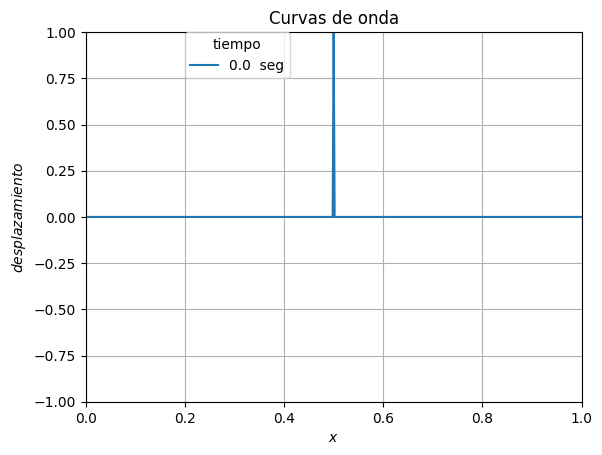

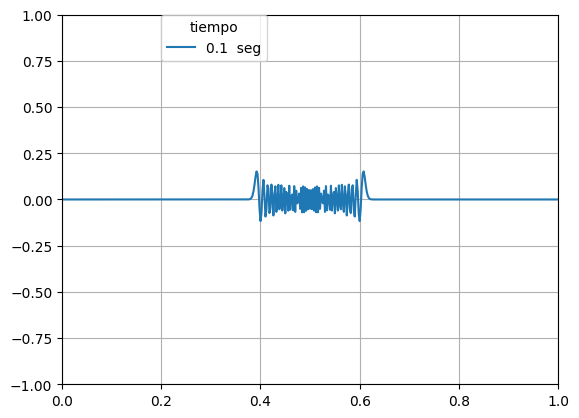

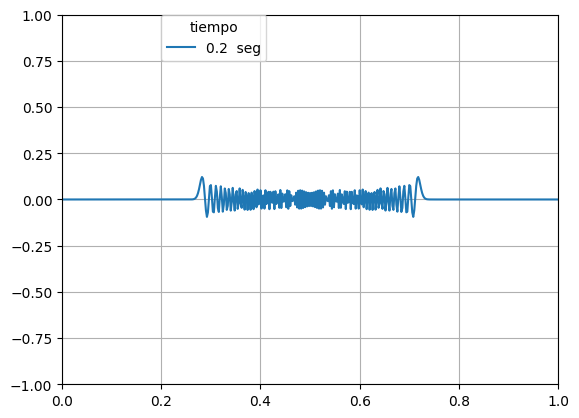

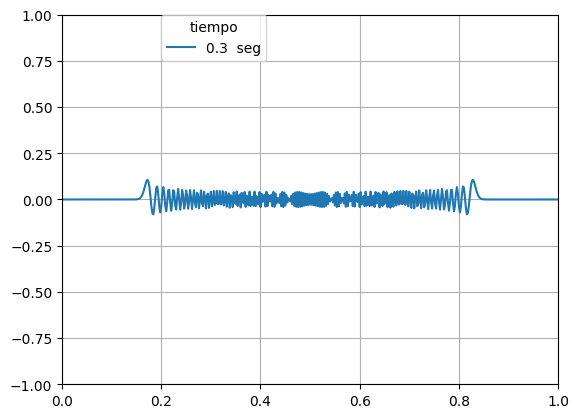

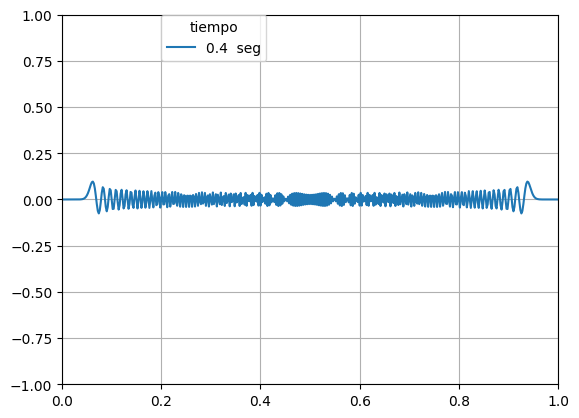

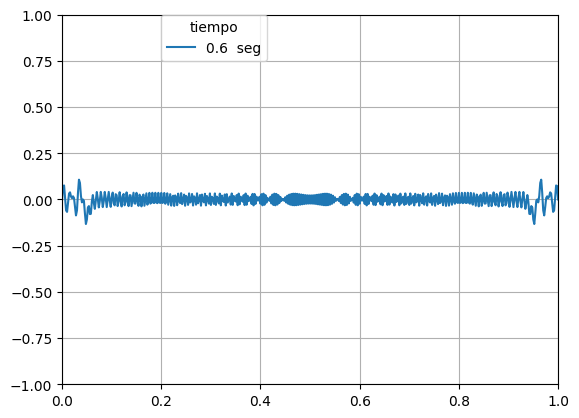

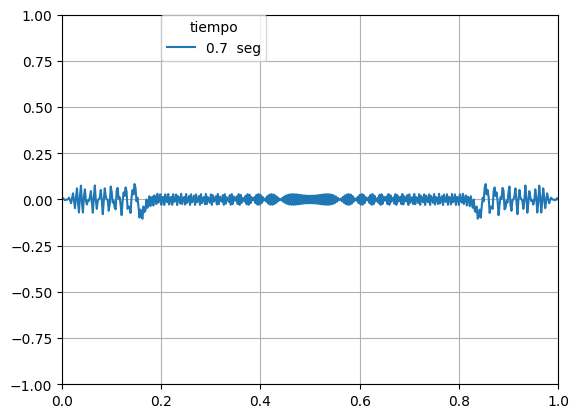

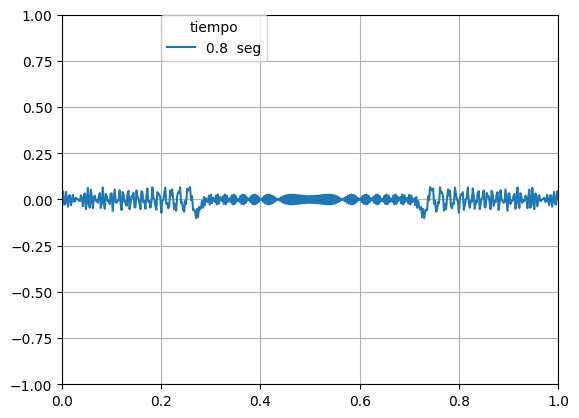

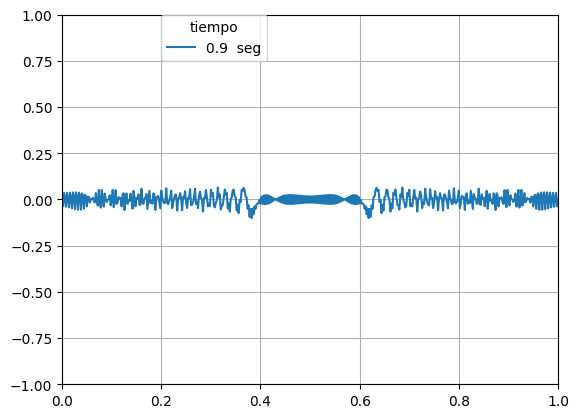

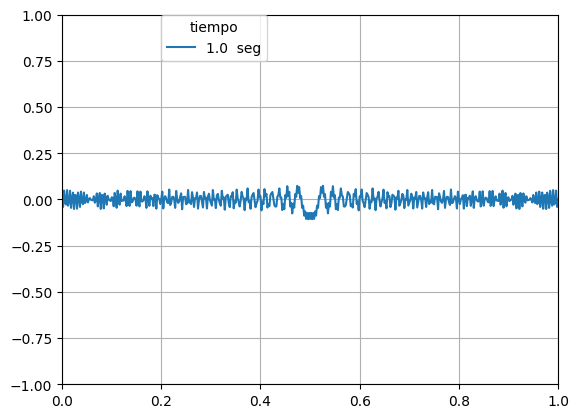

In [28]:
# graficamos las curvas
params={'legend.fontszie':5, 'legend.handlength':1}
params={'axes.labelsize': 'x-large'}
params={'axes.titlesize':'x-large'}

Ndt=111
plt.xlabel(r'$x$')
plt.ylabel(r'$desplazamiento$')
plt.title(r'Curvas de onda')

Nt = int(nt/2)

# dominio
X = np.linspace(a,b, w.shape[0])

for j in range(0, nt, Ndt):
    t = j*dt + t0

    plt.plot(X, w[:,j], label=str(round(t,1)) + '  seg')
    plt.axis([0,1.0, -1,1])

    plt.grid(True)
    plt.legend(bbox_to_anchor=(0.2, 1), loc=2, borderaxespad=0.0, title="tiempo")
    plt.show()
    plt.pause(0.1)


In [29]:
# usamos gamma=1 donde no hay dispersion
# una forma de tener gamma=1  es nx=1001
nx=1001
w=solve_waveeq(v, a, b, t0, nt, nx, dt, e, f, p, q, g)

error: la condicion de estabilidad fue violada. Reduzca dt
dimensions of w (1001, 1001)


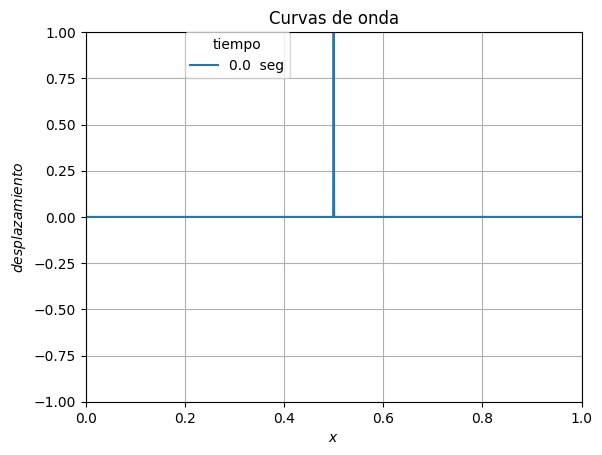

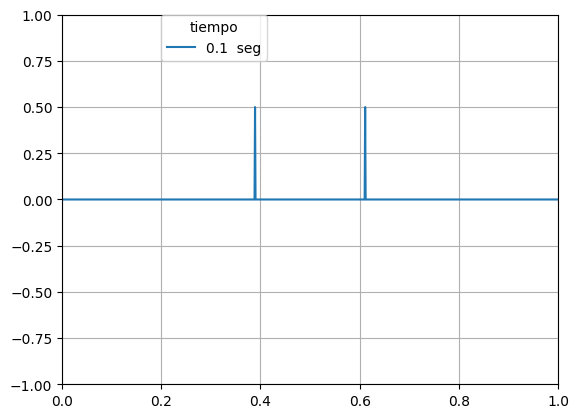

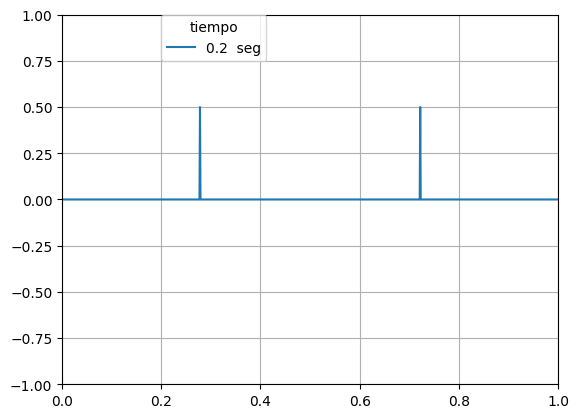

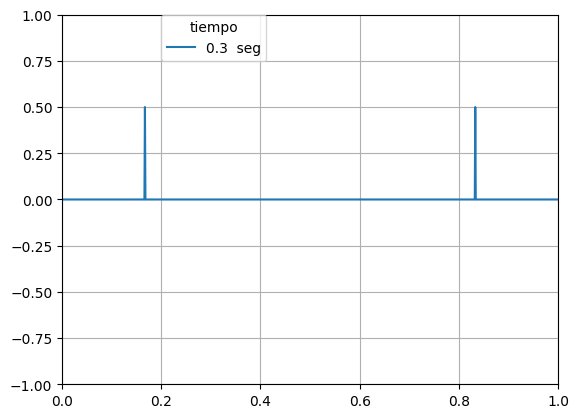

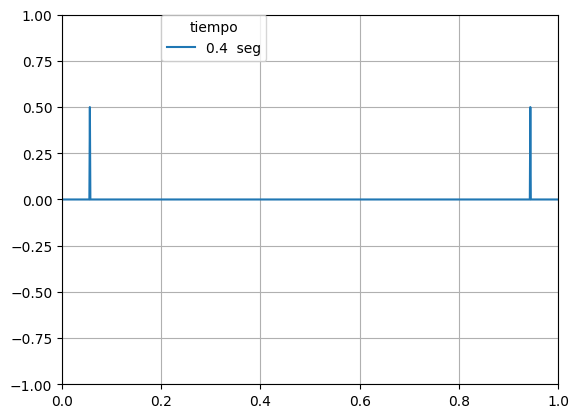

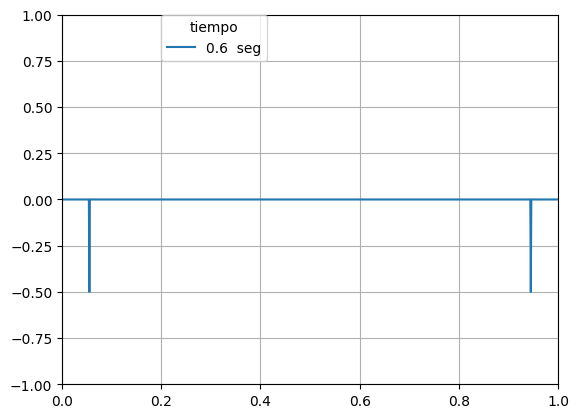

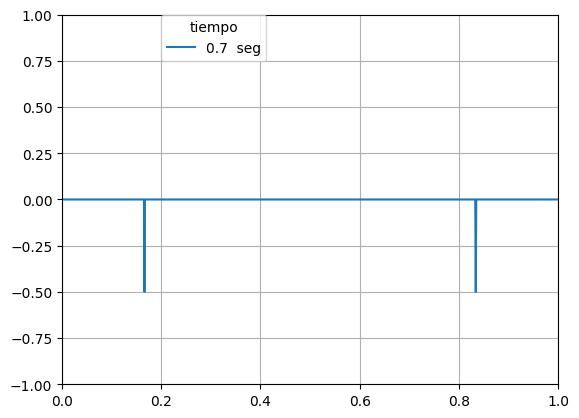

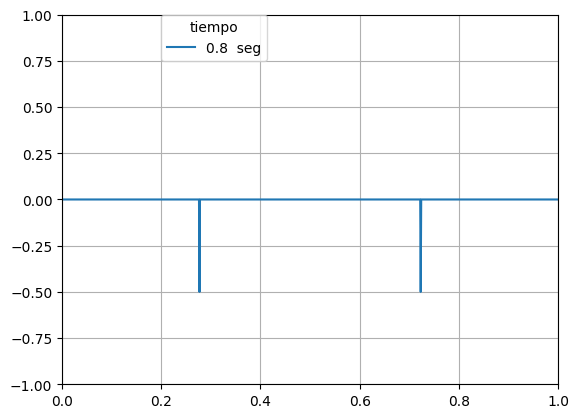

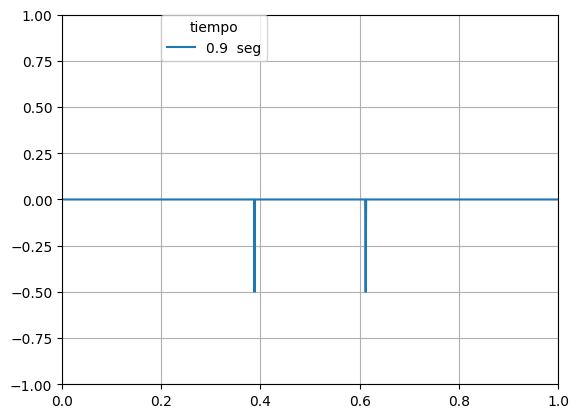

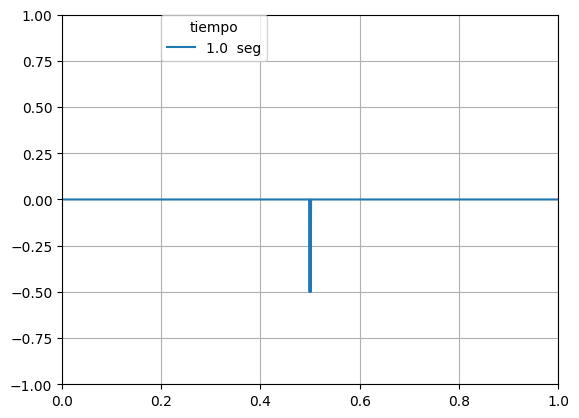

In [31]:
# graficamos las curvas
params={'legend.fontszie':5, 'legend.handlength':1}
params={'axes.labelsize': 'x-large'}
params={'axes.titlesize':'x-large'}

Ndt=111
plt.xlabel(r'$x$')
plt.ylabel(r'$desplazamiento$')
plt.title(r'Curvas de onda')

Nt = int(nt/2)

# dominio
X = np.linspace(a,b, w.shape[0])

for j in range(0, nt, Ndt):
    t = j*dt + t0

    plt.plot(X, w[:,j], label=str(round(t,1)) + '  seg')
    plt.axis([0,1.0, -1,1])

    plt.grid(True)
    plt.legend(bbox_to_anchor=(0.2, 1), loc=2, borderaxespad=0.0, title="tiempo")
    plt.show()
    plt.pause(1)


In [ ]:
# make an animation.


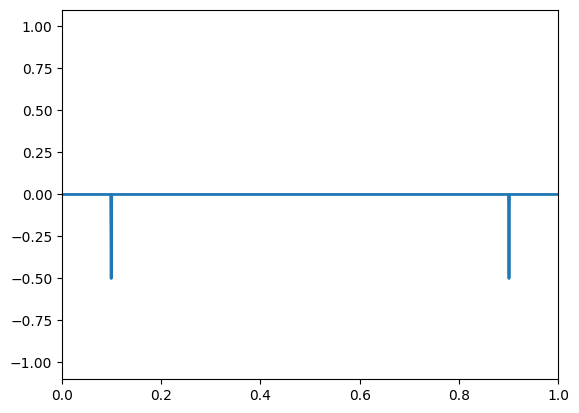

In [32]:
from matplotlib.animation import FuncAnimation

X = np.linspace(a,b,w.shape[0])
fig , ax = plt.subplots()

line, = ax.plot([], [], lw=2)

# set limits
ax.set_xlim(0,1)
ax.set_ylim(-1.1,1.1)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# update function
def update(num):
    line.set_data(X, w[:,num])
    return line,

# create the animation
j_max = 600
anim = FuncAnimation(fig, update, frames=j_max, init_func=init, blit=True, interval=20)

# save animation
anim.save('advec.gif', writer='Pillow')

## Dispersion en la ecuacion de adveccion
Recuerde la Ecuacion (1)

$$w_{i j+1} = -\frac{\gamma}{4} ( w_{i+1 j+1} - w_{i-1 j+1}) - \frac{\gamma}{4} (w_{i+1 j} - w_{i-1 j}) + w_{ij} \tag{1} $$

Si le sacamos la doble transformada de Fourier (en tiempo y espacio a frecuencia $\omega$ y numero de onda $k=2 \pi/\lambda$)

$$W_{ij} \mathrm{e}^{-\mathrm{i} \omega \Delta t} = -\frac{\gamma}{4} ( \mathrm{e}^{\mathrm{i} k \Delta x} \mathrm{e}^{-\mathrm{i} \omega \Delta t} -  \mathrm{e}^{-\mathrm{i} \omega \Delta t} \mathrm{e}^{-\mathrm{i} k \Delta x}  )
W_{ij} - \frac{\gamma}{4} ( \mathrm{e}^{\mathrm{i} k \Delta x} - \mathrm{e}^{-\mathrm{i} k \Delta x}) W_{ij} + W_{ij}$$